# Introduction

In [ ]:
"""
What? K-means on digits

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import modules

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import rcParams
from sklearn.manifold import TSNE

# Goal

In [ ]:
"""
We will attempt to use k-means to try to identify similar digits without using the original label information; 
this might be similar to a first step in extracting meaning from a new dataset about which you don’t have any 
a priori label information.
"""

# Load the dataset

In [ ]:
"""
The digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel 
in an 8×8 image:
"""

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

# K-means clustering

In [ ]:
"""
The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points,
and can themselves be interpreted as the “typical” digit within the cluster.
"""

In [5]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

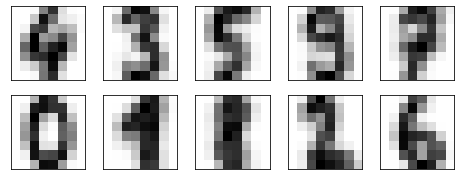

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) 
centers = kmeans.cluster_centers_.reshape(10, 8, 8) 
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
"""
We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with 
perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this 
by matching each learned cluster label with the true labels found in them:
"""

In [13]:
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
"""
Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:
"""

In [15]:
accuracy_score(digits.target, labels)

0.7935447968836951

In [ ]:
"""
With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let’s 
check the confusion matrix for this 
"""

Text(67.2, 0.5, 'predicted label')

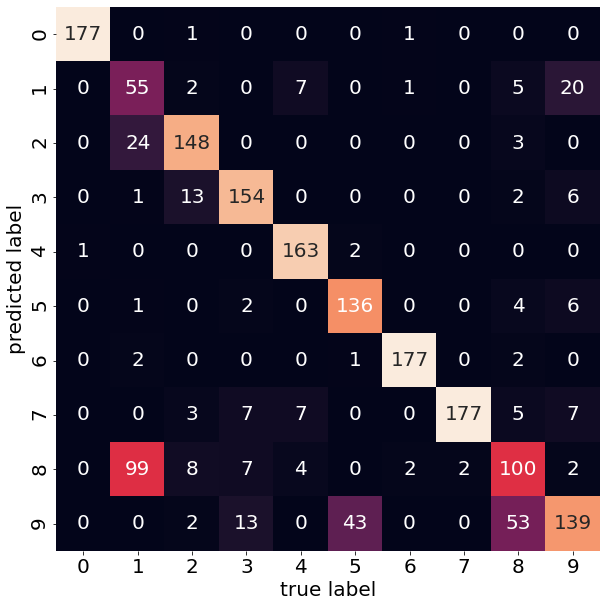

In [24]:
rcParams['figure.figsize'] = 10, 10
rcParams['font.size'] = 20

mat = confusion_matrix(digits.target, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                        xticklabels=digits.target_names,
                        yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
"""
As we might expect from the cluster centers we visualized before, the main point of confusion is between the 
eights and ones. But this still shows that using k-means, we can essentially build a digit classifier without 
reference to any known labels!
"""

# t-SNE as a pre-processing for K-means

In [ ]:
"""
How can we push this even further? We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm 
to preprocess the data before performing k-means. t-SNE is a non‐linear embedding algorithm that is particularly 
adept at preserving points within clusters. 
"""

In [27]:
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9443516972732332

In [ ]:
"""
That’s nearly 94% classification accuracy without using the labels. This is the power of unsupervised learning 
when used carefully: it can extract information from the data‐ set that it might be difficult to do by hand or 
by eye.
"""